In [2]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("Sentdex/GPyT")
model = AutoModelWithLMHead.from_pretrained("Sentdex/GPyT").to('cuda')

def generate(code, max_length=100):
    '''Takes input code, replaces newline chars with <N>,
    tokenizes, feeds thru model, decodes,
    then reformats the newlines back in'''

    newlinechar = '<N>'
    converted = code.replace('\n', newlinechar)

    tokenized = tokenizer.encode(converted, return_tensors='pt').to('cuda') # type: ignore
    resp = model.generate(tokenized, max_length=max_length).to('cuda')

    decoded = tokenizer.decode(resp[0])
    reformatted = decoded.replace('<N>', '\n')

    return reformatted

/home/bill/.local/lib/python3.10/site-packages/transformers/models/auto/modeling_auto.py:1423: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


2023-08-24 15:39:34.431430: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 15:39:34.470450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def next_line_only(original, model_out):
    orig_nl = original.count('\n')
    
    one_more_lines = [l for l in model_out.splitlines(True)][:orig_nl + 1]
    one_more_line = ''.join(one_more_lines)

    return one_more_line

In [4]:
def stop_at_repeat(model_out):
    lines = model_out.splitlines(True)
    no_repeat = ''

    for l in lines:
        if no_repeat.count(l) == 0 or l == '\n':
            no_repeat += l
        else:
            return no_repeat
    return no_repeat

In [22]:
inp = """import tensorflow as tf
from tensorflow.keras.models import Sequential

model = Sequential()
# 3 conv layers
model.add("""
print(generate(inp, max_length=512))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


import tensorflow as tf
from tensorflow.keras.models import Sequential

model = Sequential()
# 3 conv layers
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same', 

In [25]:
inp = """# build a website

"""

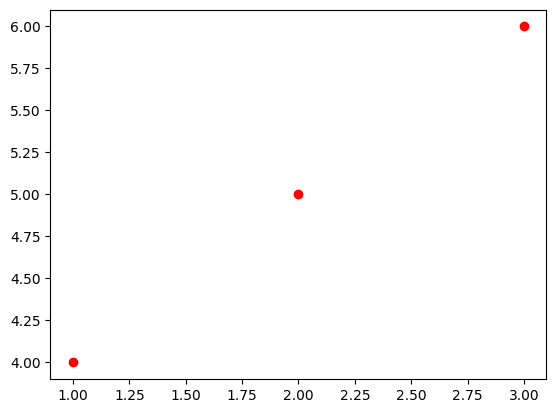

In [15]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [4, 5, 6]
# scatterplot
plt.scatter(x, y, c='r', label='x')